In [1]:
from large_gcs.contact.contact_regions_set import ContactRegionParams
from large_gcs.graph_generators.contact_graph_generator import ContactGraphGenerator, ContactGraphGeneratorParams
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.graph_generators.contact_graph_generator import ContactGraphGeneratorParams
from large_gcs.graph.incremental_contact_graph import IncrementalContactGraph

import logging
logging.basicConfig(level=logging.WARN)
logging.getLogger("large_gcs").setLevel(logging.DEBUG)
logging.getLogger("large_gcs.geometry.convex_set").setLevel(logging.INFO)
logger = logging.getLogger(__name__)
import numpy as np
import matplotlib.pyplot as plt

INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 1 body pairs...


Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-05


100%|██████████| 1/1 [00:00<00:00, 146.74it/s]
INFO:large_gcs.graph.contact_graph:Loading 8 contact pair modes for 2 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact sets for 8 sets...
100%|██████████| 8/8 [00:00<00:00, 3053.18it/s]
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 10/10 [00:00<00:00, 22333.89it/s]
INFO:large_gcs.graph.graph:Adding 10 vertices to graph...
100%|██████████| 10/10 [00:00<00:00, 23953.76it/s]
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 48/48 [00:00<00:00, 26861.45it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 48/48 [00:00<00:00, 17752.10it/s]
INFO:large_gcs.graph.graph:Adding 48 edges to graph...
100%|██████████| 48/48 [00:00<00:00, 20331.91it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(4, 11), n_vertices=10, n_edges=48, source=[array([0, 0]), array([-2, -2])], target='regions', workspace=array([[-3,  3],

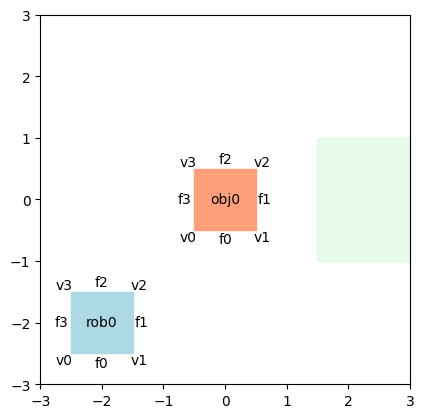

In [2]:
graph_name = "cg_simple_1"
graph_file = ContactGraphGeneratorParams.graph_file_path_from_name(
    graph_name
)
cg = ContactGraph.load_from_file(
    graph_file,
    should_use_l1_norm_vertex_cost=True,
)
source_vertex = cg.source
target_vertex = cg.target
cg.plot()

INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 2/2 [00:00<00:00, 32140.26it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 21959.71it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 1 body pairs...
100%|██████████| 1/1 [00:00<00:00, 134.56it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (28)
100%|██████████| 28/28 [00:00<00:00, 6438.62it/s]


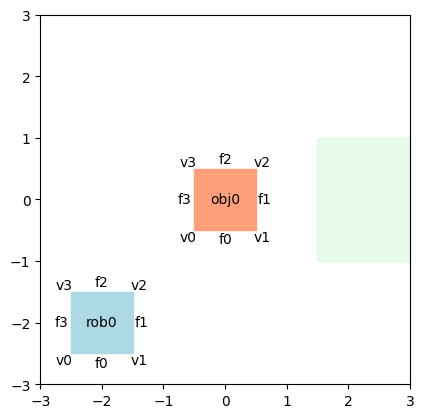

In [3]:


graph_file_inc = ContactGraphGeneratorParams.inc_graph_file_path_from_name(graph_name)
cg_inc = IncrementalContactGraph.load_from_file(
    graph_file_inc,
    should_use_l1_norm_vertex_cost=True,
)
cg_inc.plot()

In [4]:
Q = ["source"]
expanded = set()
while len(Q) > 0:
    v = Q.pop()
    if v in expanded or v == "target":
        continue
    expanded.add(v)
    cg_inc.generate_successors(v)
    for u in cg_inc.successors(v):
        if u in expanded:
            continue
        Q.append(u)

In [5]:
cg_inc.vertex_names

['source',
 'target',
 "('NC|obj0_f0-rob0_f2',)",
 "('IC|obj0_f0-rob0_f2',)",
 "('IC|obj0_f1-rob0_f3',)",
 "('IC|obj0_f3-rob0_f1',)",
 "('NC|obj0_f1-rob0_f3',)",
 "('NC|obj0_f3-rob0_f1',)",
 "('IC|obj0_f2-rob0_f0',)",
 "('NC|obj0_f2-rob0_f0',)"]

In [6]:
cg_inc.edge_keys

['("source", "(\'NC|obj0_f0-rob0_f2\',)")',
 '("(\'NC|obj0_f0-rob0_f2\',)", "(\'IC|obj0_f0-rob0_f2\',)")',
 '("(\'NC|obj0_f0-rob0_f2\',)", "(\'IC|obj0_f1-rob0_f3\',)")',
 '("(\'NC|obj0_f0-rob0_f2\',)", "(\'IC|obj0_f3-rob0_f1\',)")',
 '("(\'NC|obj0_f0-rob0_f2\',)", "(\'NC|obj0_f1-rob0_f3\',)")',
 '("(\'NC|obj0_f0-rob0_f2\',)", "(\'NC|obj0_f3-rob0_f1\',)")',
 '("(\'NC|obj0_f0-rob0_f2\',)", "target")',
 '("(\'NC|obj0_f3-rob0_f1\',)", "(\'IC|obj0_f0-rob0_f2\',)")',
 '("(\'NC|obj0_f3-rob0_f1\',)", "(\'IC|obj0_f2-rob0_f0\',)")',
 '("(\'NC|obj0_f3-rob0_f1\',)", "(\'IC|obj0_f3-rob0_f1\',)")',
 '("(\'NC|obj0_f3-rob0_f1\',)", "(\'NC|obj0_f0-rob0_f2\',)")',
 '("(\'NC|obj0_f3-rob0_f1\',)", "(\'NC|obj0_f2-rob0_f0\',)")',
 '("(\'NC|obj0_f3-rob0_f1\',)", "target")',
 '("(\'NC|obj0_f2-rob0_f0\',)", "(\'IC|obj0_f1-rob0_f3\',)")',
 '("(\'NC|obj0_f2-rob0_f0\',)", "(\'IC|obj0_f2-rob0_f0\',)")',
 '("(\'NC|obj0_f2-rob0_f0\',)", "(\'IC|obj0_f3-rob0_f1\',)")',
 '("(\'NC|obj0_f2-rob0_f0\',)", "(\'NC|obj0_f1-ro

In [7]:
cg.edge_keys

['("(\'IC|obj0_f0-rob0_f2\',)", "(\'IC|obj0_f1-rob0_f3\',)")',
 '("(\'IC|obj0_f1-rob0_f3\',)", "(\'IC|obj0_f0-rob0_f2\',)")',
 '("(\'IC|obj0_f0-rob0_f2\',)", "(\'IC|obj0_f3-rob0_f1\',)")',
 '("(\'IC|obj0_f3-rob0_f1\',)", "(\'IC|obj0_f0-rob0_f2\',)")',
 '("(\'IC|obj0_f0-rob0_f2\',)", "(\'NC|obj0_f0-rob0_f2\',)")',
 '("(\'NC|obj0_f0-rob0_f2\',)", "(\'IC|obj0_f0-rob0_f2\',)")',
 '("(\'IC|obj0_f0-rob0_f2\',)", "(\'NC|obj0_f1-rob0_f3\',)")',
 '("(\'NC|obj0_f1-rob0_f3\',)", "(\'IC|obj0_f0-rob0_f2\',)")',
 '("(\'IC|obj0_f0-rob0_f2\',)", "(\'NC|obj0_f3-rob0_f1\',)")',
 '("(\'NC|obj0_f3-rob0_f1\',)", "(\'IC|obj0_f0-rob0_f2\',)")',
 '("(\'IC|obj0_f0-rob0_f2\',)", "target")',
 '("(\'IC|obj0_f1-rob0_f3\',)", "(\'IC|obj0_f2-rob0_f0\',)")',
 '("(\'IC|obj0_f2-rob0_f0\',)", "(\'IC|obj0_f1-rob0_f3\',)")',
 '("(\'IC|obj0_f1-rob0_f3\',)", "(\'NC|obj0_f0-rob0_f2\',)")',
 '("(\'NC|obj0_f0-rob0_f2\',)", "(\'IC|obj0_f1-rob0_f3\',)")',
 '("(\'IC|obj0_f1-rob0_f3\',)", "(\'NC|obj0_f1-rob0_f3\',)")',
 '("(\'NC|o

In [8]:
cg_inc.n_vertices, cg_inc.n_edges

(10, 47)